In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import pandas as pd
import pickle as pkl
import glob
from utils import constants as cnst


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


##### Load 1 year of soil moisture data

In [29]:
path = cnst.network_data + 'data/OBS/AMSRE/aqua/nc_day/AMSR_L3_LPRMv05_A_*0624.nc'
files = glob.glob(path)

In [30]:
print(files)

['/home/ck/DIR/cornkle/data/OBS/AMSRE/aqua/nc_day/AMSR_L3_LPRMv05_A_20080624.nc', '/home/ck/DIR/cornkle/data/OBS/AMSRE/aqua/nc_day/AMSR_L3_LPRMv05_A_20070624.nc', '/home/ck/DIR/cornkle/data/OBS/AMSRE/aqua/nc_day/AMSR_L3_LPRMv05_A_20100624.nc', '/home/ck/DIR/cornkle/data/OBS/AMSRE/aqua/nc_day/AMSR_L3_LPRMv05_A_20110624.nc', '/home/ck/DIR/cornkle/data/OBS/AMSRE/aqua/nc_day/AMSR_L3_LPRMv05_A_20050624.nc', '/home/ck/DIR/cornkle/data/OBS/AMSRE/aqua/nc_day/AMSR_L3_LPRMv05_A_20030624.nc', '/home/ck/DIR/cornkle/data/OBS/AMSRE/aqua/nc_day/AMSR_L3_LPRMv05_A_20040624.nc', '/home/ck/DIR/cornkle/data/OBS/AMSRE/aqua/nc_day/AMSR_L3_LPRMv05_A_20060624.nc', '/home/ck/DIR/cornkle/data/OBS/AMSRE/aqua/nc_day/AMSR_L3_LPRMv05_A_20090624.nc']


In [31]:
data = xr.open_mfdataset(files, autoclose=True).load()

In [32]:
data = data.sel(lon=slice(-10,10), lat=slice(9,20))

In [33]:
alls = data['SM'].values[np.isfinite(data['SM']).values].flatten()

#### SM histogram original data: Like rainfall, SM is not normally distributed

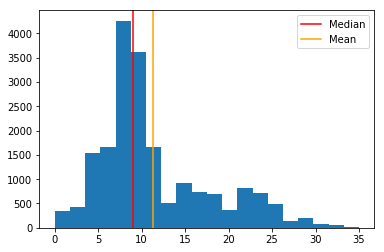

In [34]:
plt.hist(alls, bins=20, range=(0,35))
#plt.axvline(x=15, color='k', label='Zero line')
plt.axvline(x=np.median(alls), color='r', label='Median')
plt.axvline(x=np.mean(alls), color='orange', label='Mean')
plt.legend()

#### SM histogram for proxy anomaly

In [35]:
valid_days = data['SM'].count(dim='time') 
mean =  data['SM'].mean(dim='time')
mean.values[valid_days.values<5] = np.nan

/home/ck/miniconda3/lib/python3.5/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [36]:
ano  = data['SM']-mean

In [37]:
data['SM'].shape

(9, 44, 80)

In [38]:
data.time

<xarray.DataArray 'time' (time: 9)>
array(['2008-06-24T13:00:00.000000000', '2007-06-24T13:00:00.000000000',
       '2010-06-24T13:00:00.000000000', '2011-06-24T13:00:00.000000000',
       '2005-06-24T13:00:00.000000000', '2003-06-24T13:00:00.000000000',
       '2004-06-24T13:00:00.000000000', '2006-06-24T13:00:00.000000000',
       '2009-06-24T13:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2008-06-24T13:00:00 ... 2009-06-24T13:00:00

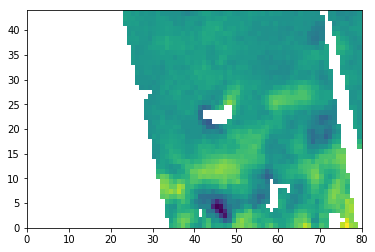

In [39]:
plt.pcolormesh(ano[5,:,:])

In [40]:
hist_ano = ano.values[np.isfinite(ano.values)]

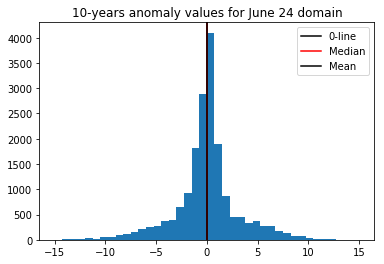

In [43]:
plt.hist(hist_ano, bins=40, range=(-15,15))
plt.axvline(x=0, color='k', label='0-line')
plt.axvline(x=np.median(hist_ano), color='r', label='Median')
plt.axvline(x=np.mean(hist_ano), color='k', label='Mean')
plt.title('10-years anomaly values for June 24 domain')
plt.legend()

In [44]:
path = cnst.network_data + 'data/OBS/AMSRE/aqua/sma_nc_day/sma_*.nc'
files = glob.glob(path)

In [45]:
data = xr.open_mfdataset(files, autoclose=True)
data = data.sel(lon=slice(-10,10), lat=slice(9,20))

In [46]:
data = data['SM'][(data['time.month']>=6) & (data['time.month']<=9)]

In [47]:
data 

<xarray.DataArray 'SM' (time: 1520, lat: 44, lon: 80)>
dask.array<shape=(1520, 44, 80), dtype=float64, chunksize=(1, 44, 80)>
Coordinates:
  * lat      (lat) float32 9.125 9.375 9.625 9.875 ... 19.375 19.625 19.875
  * lon      (lon) float32 -9.875 -9.625 -9.375 -9.125 ... 9.375 9.625 9.875
  * time     (time) datetime64[ns] 2005-06-27 2016-08-17 ... 2007-09-22

In [48]:
data.shape

(1520, 44, 80)

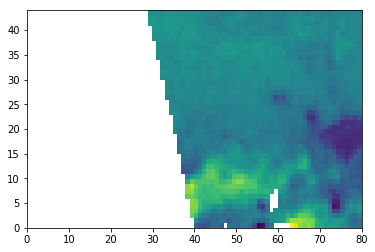

In [50]:
plt.pcolormesh(data[15,:,:])

In [53]:
hist_ano = data.values[np.isfinite(data.values)]

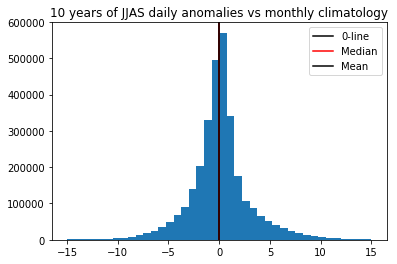

In [54]:
plt.hist(hist_ano, bins=40, range=(-15,15))
plt.axvline(x=0, color='k', label='0-line')
plt.axvline(x=np.median(hist_ano), color='r', label='Median')
plt.axvline(x=np.mean(hist_ano), color='k', label='Mean')
plt.title('10 years of JJAS daily anomalies vs monthly climatology')
plt.legend()